In [95]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

In [96]:
# Load the dataset
file_path = 'loan_data.csv'
loan_data = pd.read_csv(file_path)

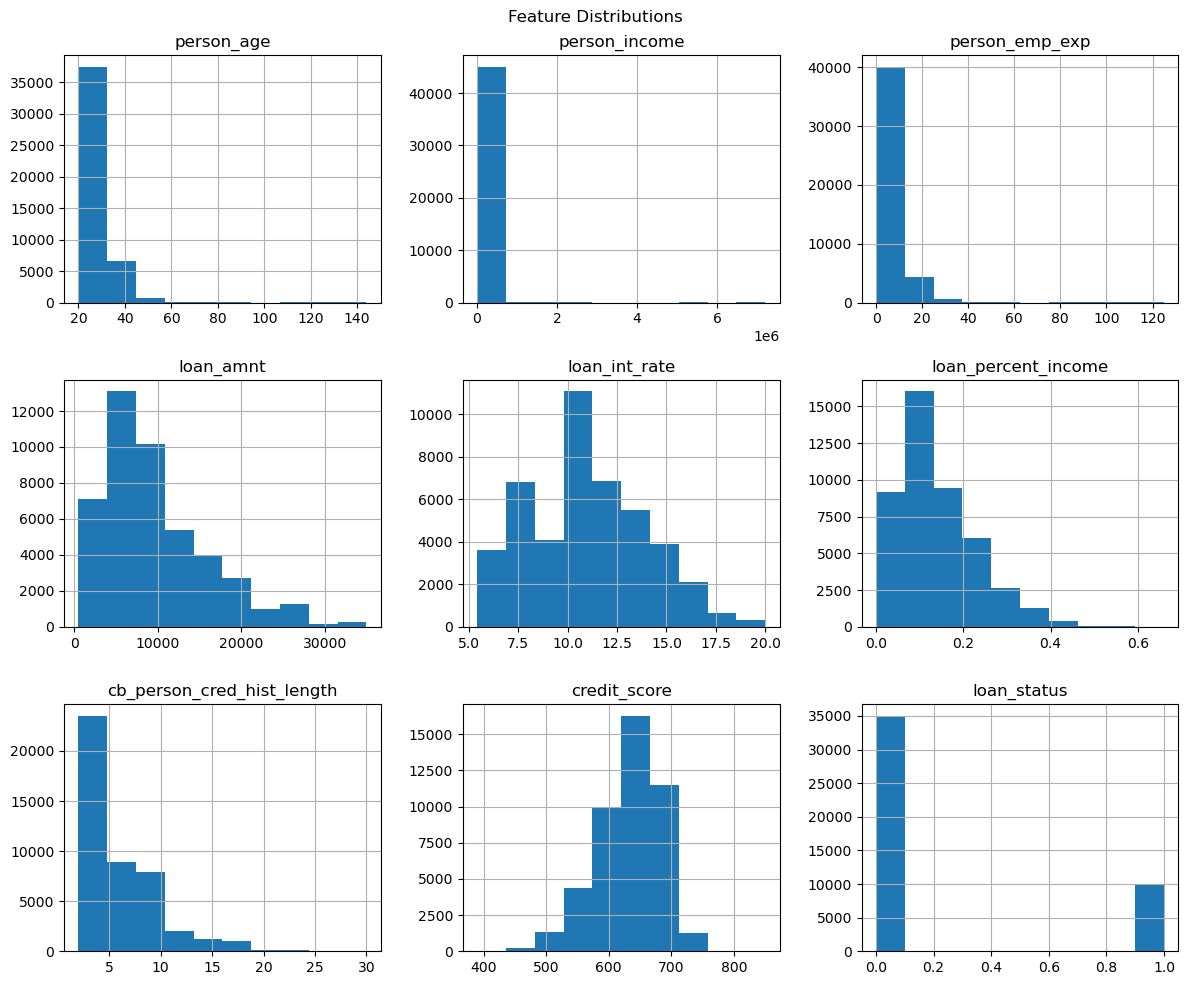

In [97]:
# Step 3: Data Exploration
# Display feature distributions
loan_data.hist(figsize=(12, 10))
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

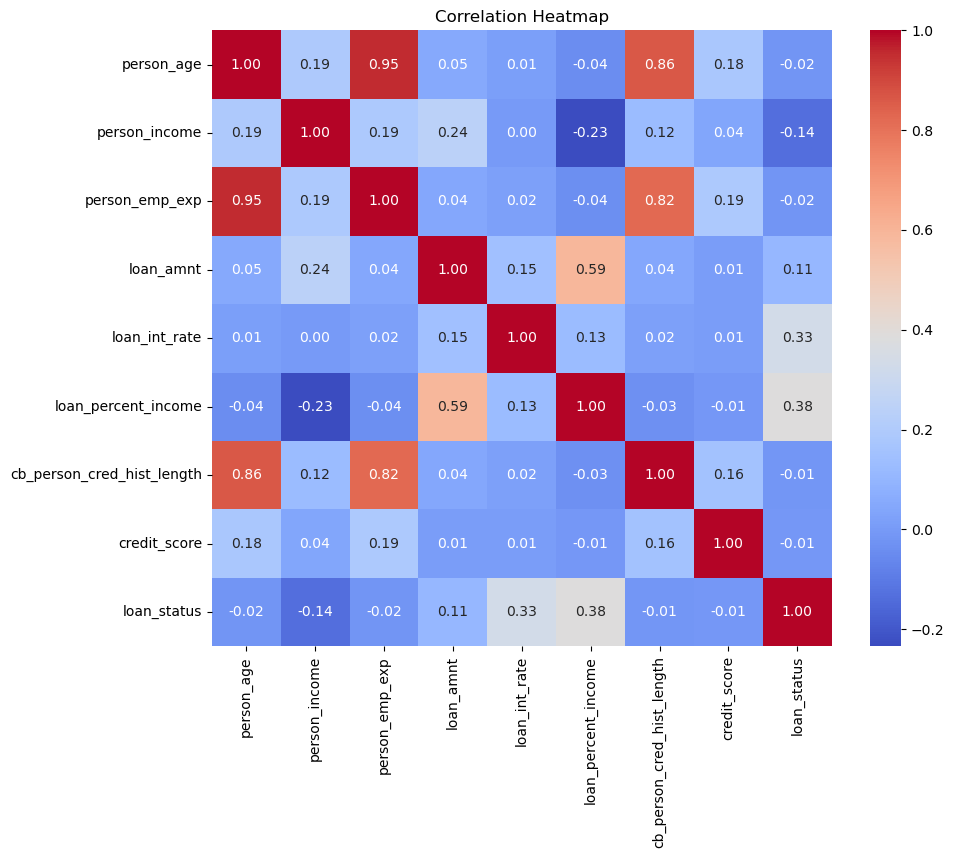

In [98]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(loan_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [101]:
# Step 4: Data Cleaning and Preparation
# Handle missing values
loan_data.fillna(loan_data.median(numeric_only=True), inplace=True)

In [126]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [127]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


In [102]:
# Encode categorical variables
categorical_columns = ['person_gender', 'person_education', 'person_home_ownership', 
                       'loan_intent', 'previous_loan_defaults_on_file']
encoder = LabelEncoder()
for col in categorical_columns:
    loan_data[col] = encoder.fit_transform(loan_data[col])

In [121]:
# Display Overview
print("Overview of Loans:")
print(overview)

Overview of Loans:
   level_0           index     loan_amnt  loan_int_rate  loan_status  \
0        0     total_loans  45000.000000            NaN          NaN   
1        1         average   9583.157556      11.006606          NaN   
2        2  approved_loans           NaN            NaN      10000.0   

   approval_rate  
0      22.222222  
1      22.222222  
2      22.222222  


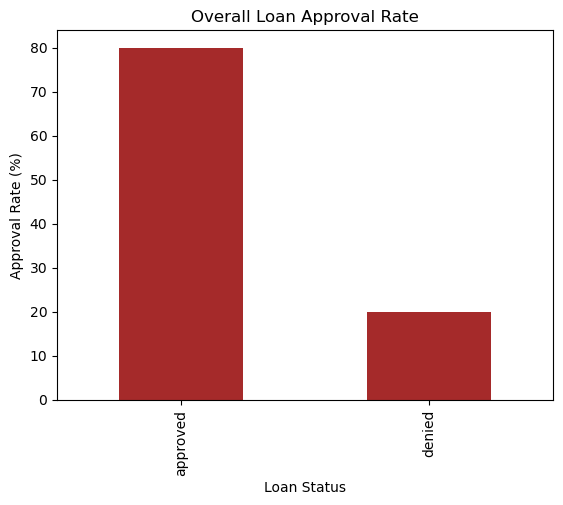

In [125]:
overview = pd.DataFrame({
    'loan_status': ['approved', 'denied'],
    'approval_rate': [80, 20]  # Example rates
})

# plot approval_rate
overview.set_index('loan_status', inplace=True)  # Setting loan_status as the index

# Plotting
overview['approval_rate'].plot(
    kind='bar',
    color='brown',
    title='Overall Loan Approval Rate',
    ylabel='Approval Rate (%)',
    xlabel='Loan Status'
)
plt.show()

In [105]:
# Display Loan Approval by Age Group
print("\nLoan Approval by Age Group:")
print(age_group_analysis)


Loan Approval by Age Group:
          loan_status                    loan_amnt approval_rate
          total_loans approved_loans          mean              
age_group                                                       
Under 25        20441           4782   9178.583093     23.394159
25-35           20073           4278   9906.704230     21.312210
36-50            4158            857   9968.729678     20.610871
Above 50          321             83  10122.127726     25.856698


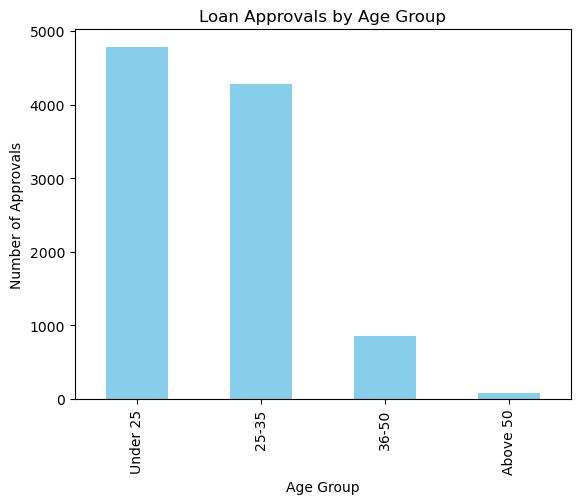

In [109]:
# Bar plot for Loan Approval by Age Group
age_group_analysis[('loan_status', 'approved_loans')].plot(kind='bar', color='skyblue', title='Loan Approvals by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Approvals')
plt.show()

In [106]:
# Display Trends by Education Level
print("\nTrends by Education Level:")
print(education_analysis)


Trends by Education Level:
                 loan_status                   loan_amnt loan_int_rate
                 total_loans approved_loans         mean          mean
person_education                                                      
Associate              12028           2650  9627.988942     10.981910
Bachelor               13399           3018  9556.113068     11.034974
Doctorate                621            142  9930.932367     11.066860
High School            11972           2671  9543.422987     10.998792
Master                  6980           1519  9595.030229     11.002748


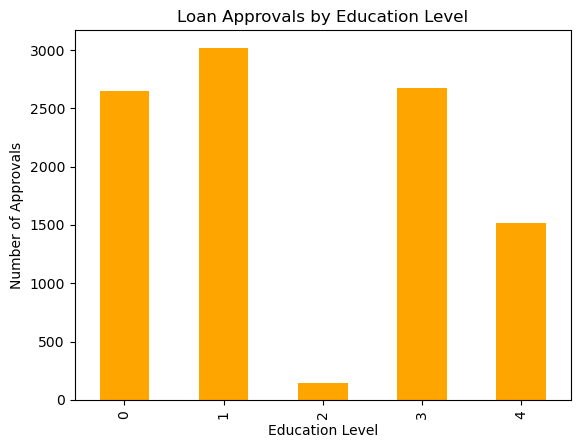

In [111]:
# Bar plot for loan approvals by education level
education_analysis[('loan_status', 'approved_loans')].plot(
    kind='bar', 
    color='orange', 
    title='Loan Approvals by Education Level'
)
plt.xlabel('Education Level')
plt.ylabel('Number of Approvals')
plt.show()

In [107]:
# Display Loan Intent Analysis
print("\nLoan Intent Analysis:")
print(intent_analysis)


Loan Intent Analysis:
                  loan_status                    loan_amnt loan_int_rate  \
                  total_loans approved_loans          mean          mean   
loan_intent                                                                
DEBTCONSOLIDATION        7145           2163   9548.333660     11.036640   
EDUCATION                9153           1552   9507.405987     10.904435   
HOMEIMPROVEMENT          4783           1258  10419.187330     11.200993   
MEDICAL                  8548           2378   9137.959172     11.084169   
PERSONAL                 7552           1521   9603.918432     10.979733   
VENTURE                  7819           1128   9658.897429     10.921014   

                  approval_rate  
                                 
loan_intent                      
DEBTCONSOLIDATION     30.272918  
EDUCATION             16.956189  
HOMEIMPROVEMENT       26.301484  
MEDICAL               27.819373  
PERSONAL              20.140360  
VENTURE             

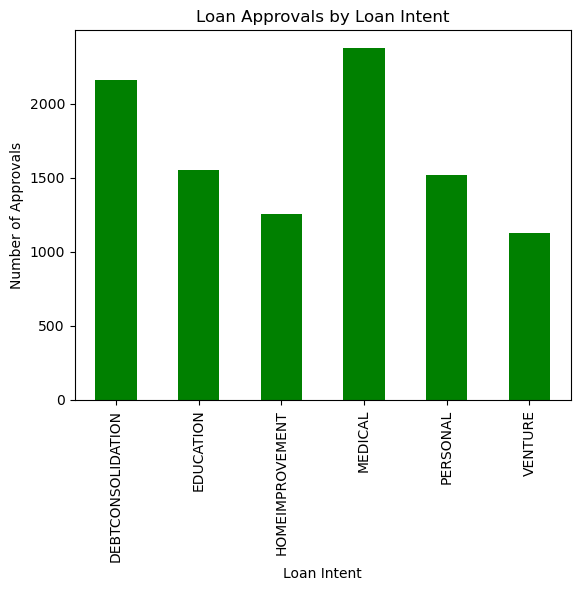

In [112]:
# Bar plot for loan approvals by loan intent
intent_analysis[('loan_status', 'approved_loans')].plot(
    kind='bar', 
    color='green', 
    title='Loan Approvals by Loan Intent'
)
plt.xlabel('Loan Intent')
plt.ylabel('Number of Approvals')
plt.show()

In [108]:
# Display Credit Score Analysis
print("\nCredit Score Analysis:")
print(credit_score_analysis)


Credit Score Analysis:
                      loan_status                   loan_amnt loan_int_rate  \
                      total_loans approved_loans         mean          mean   
credit_score_category                                                         
Poor (<500)                   529            112  9337.011342     10.777996   
Fair (500-650)              26001           5870  9554.244952     10.986117   
Good (651-750)              18436           4010  9630.938381     11.042338   
Excellent (>750)               34              8  9614.941176     10.856765   

                      approval_rate  
                                     
credit_score_category                
Poor (<500)               21.172023  
Fair (500-650)            22.576055  
Good (651-750)            21.750922  
Excellent (>750)          23.529412  


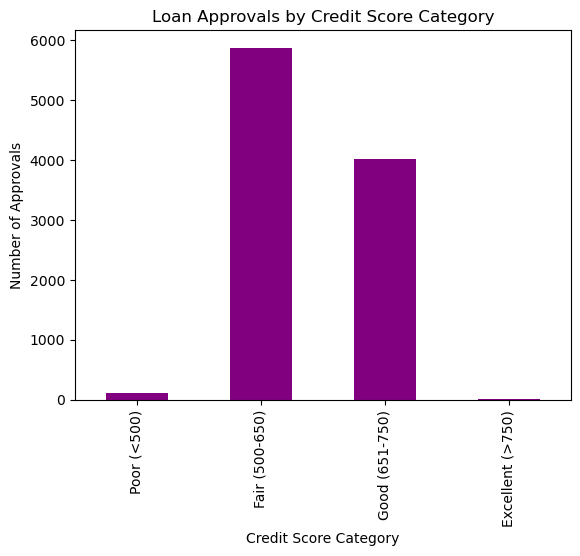

In [113]:
# Bar plot for loan approvals by credit score category
credit_score_analysis[('loan_status', 'approved_loans')].plot(
    kind='bar', 
    color='purple', 
    title='Loan Approvals by Credit Score Category'
)
plt.xlabel('Credit Score Category')
plt.ylabel('Number of Approvals')
plt.show()

In [128]:
# Step 6: Feature Selection and Scaling
X = loan_data.drop(columns=['loan_status'])
y = loan_data['loan_status']

In [129]:
# Step 6: Feature Selection and Scaling
X = loan_data.drop(columns=['loan_status'])
y = loan_data['loan_status']

In [132]:
# Convert 'Age Group' to numeric using one-hot encoding
loan_data = pd.get_dummies(loan_data, columns=['Age Group'], drop_first=True)

# Re-encode remaining categorical variables
categorical_columns = ['person_gender', 'person_education', 'person_home_ownership', 
                       'loan_intent', 'previous_loan_defaults_on_file']
encoder = LabelEncoder()
for col in categorical_columns:
    loan_data[col] = encoder.fit_transform(loan_data[col])

In [133]:
# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [136]:
# Reprocess data with corrected encoding
X = loan_data.drop(columns=['loan_status'])
y = loan_data['loan_status']

In [137]:
# Standardize numeric features
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

In [138]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [139]:
# Model Training
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [140]:
# Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [141]:
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_rep)

Model Accuracy: 92.62%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7000
           1       0.89      0.76      0.82      2000

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.92      0.93      0.92      9000



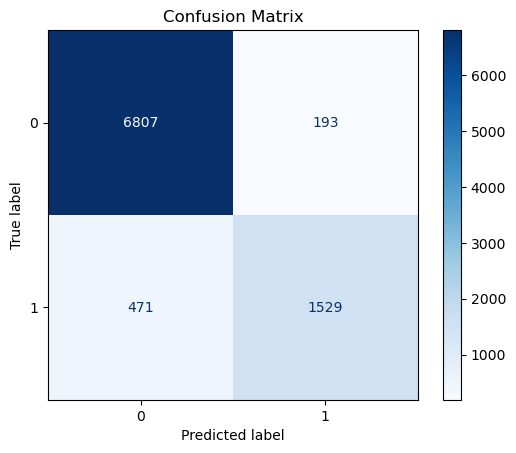

In [142]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [143]:
# Feature Importance Visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

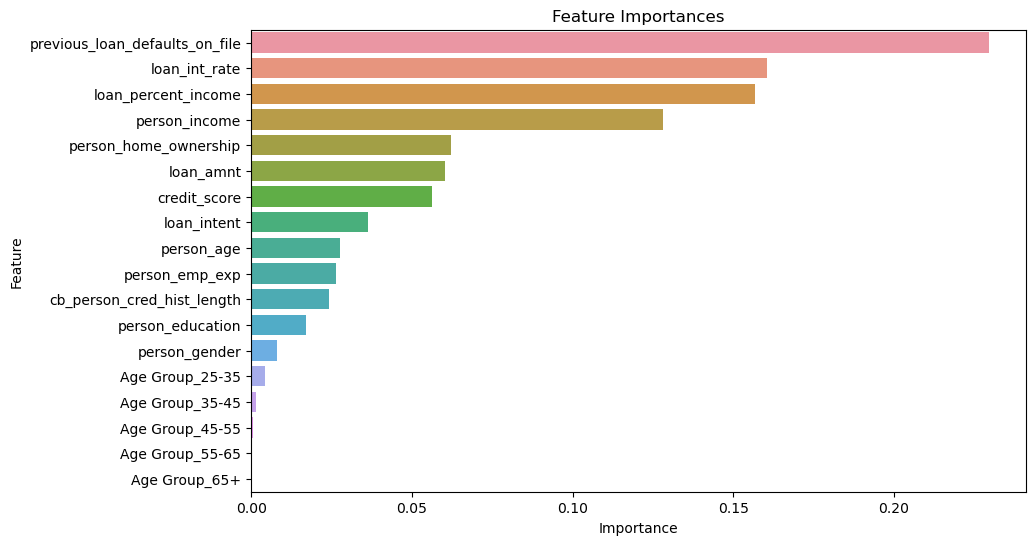

In [144]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature')
plt.title("Feature Importances")
plt.show()